In [3]:
%load_ext pycodestyle_magic

In [4]:
%pycodestyle_on

In [5]:
# all imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [6]:
def my_int(value):  # преобразование чисел с запятой в числа с точкой

    if isinstance(value, list):
        value = value[0]

    if len(value) == 1:
        return float(value)
    else:
        value = list(map(str, value.split(',')))
        if len(value) == 2:
            return float(value[0]) + (float(value[1]) / (10 ** len(str(value[1]))))
        else:
            return float(value[0])

11:80: E501 line too long (83 > 79 characters)


In [21]:
def mnk(data_x, data_y, g=0):   # метод наименьших квадратов с расчетом погрешностей для коэффициентов
    '''
    "from seminar"
    #Взято с:
    #https://npm.mipt.ru/books/lab-intro/main.pdf
    '''

    # s = np.array([[int(s1[i]), int(s1[i + 1])]for i in range(0, len(s1), 2)])
    s = np.array([[data_x[i], data_y[i]] for i in range(len(data_x))])
    sum_x = np.sum([i[0] for i in s])
    sum_y = np.sum([i[1] for i in s])
    sum_xy = np.sum([i[0] * i[1] for i in s])
    sum_xx = np.sum([i[0] * i[0] for i in s])

    a = ((len(s) * sum_xy) - (sum_x * sum_y)) / ((len(s) * sum_xx) - sum_x ** 2)  # коэфициэент при x
    b = (sum_y - (a * sum_x)) / len(s)  # свободный член

    y_mean = np.mean(sum_y)
    x_mean = np.mean(sum_x)
    D_yy = np.mean((data_y - y_mean) ** 2)
    D_xx = np.mean((data_x - x_mean) ** 2)
    # print(D_xx, D_yy, a)

    if g == 1:
        # погрешности для коэфициэнтов прямой построенной
        ga = ((1 / (len(s) - 2)) * (np.abs((D_yy / D_xx) - (a ** 2)))) ** (1/2)
        gb = ga * ((np.mean(data_x ** 2)) ** (1 / 2))  # с помощью МНК
        # print(ga, gb)
        return a, b, ga, gb
    else:
        return a, b, 0, 0

1:80: E501 line too long (102 > 79 characters)
15:80: E501 line too long (101 > 79 characters)


In [8]:
def isnan(value):  # проверка на nan
    try:
        return math.isnan(float(value))
    except ValueError:  # maybe need TypeError
        return False

In [9]:
def delet_nan(data, line=1):  # убирание из списка nan элементов
    '''
    при line=0 возращфет список списков разграниченных элементом nan,
    иначе просто удаляет nan
    '''

    s = []
    new_data = []

    if line == 0:
        for i in data:
            if not isnan(i):
                s.append(i)
            else:
                if len(s) != 0:
                    new_data.append(s)
                    s = []
                else:
                    s = []
        return new_data

    else:
        for i in data:
            if not isnan(i):
                new_data.append(i)
        return np.array(new_data)

In [10]:
def my_std(data):  # std(s) / sqrt(len(s))
    return np.std(data) / (len(data) ** (1 / 2))

In [23]:
# вытаскивание даты из таблиц

df = pd.read_csv(r"C:\Users\12345\PythonProjects\Labs\1.2.5\Лаба 1.2.5 - Лист1.csv")# путь до csv таблицы
# print(df.columns)# все колонки таблицы

data_y = df["угловая скорость (рад/с)"]  # считывание даты из колонки
data_y = delet_nan(data_y)
data_y = np.array([my_int(i) for i in data_y])
data_y = np.append(data_y, [0] * 10)
print(data_y)
# data = [list(map(my_int, i.split('+-'))) for i in data]# разделение строки с значениями на int элементы

data_x = df['массы, г']  # считывание даты из колонки
data_x = delet_nan(data_x)
data_x = np.array([my_int(i) for i in data_x[:5]])
data_x = np.append(data_x, [0] * 10)
data_x = data_x / 1000
print(data_x)

data_for_errorbar_y = delet_nan(df['погрешности (рад/с)'])  # возращает все 
data_for_errorbar_y = np.array([my_int(i) for i in data_for_errorbar_y])
print(data_for_errorbar_y)


data_for_errorbar_x = delet_nan(df['погрешность г'])
data_for_errorbar_x = np.array([my_int(i) for i in data_for_errorbar_x[:5]])
data_for_errorbar_x = data_for_errorbar_x / 1000
print(data_for_errorbar_x)

3:80: E501 line too long (105 > 79 characters)
3:85: E261 at least two spaces before inline comment
11:80: E501 line too long (105 > 79 characters)
20:76: W291 trailing whitespace


[0.25128    0.16752    0.13461429 0.10925217 0.08664828 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
[0.3355 0.2691 0.2134 0.1738 0.138  0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.    ]
[0.0008376  0.0005584  0.00048077 0.00047501 0.00029879]
[0.0002 0.0002 0.0002 0.0002 0.0002]


In [11]:
class MyCustomValueError(Exception):  # In messege need to input place or function
    def __init__(self, *args):
        if args:
            self.messege = args[0]
        else:
            self.messege = None

    def __str__(self):
        if self.messege:
            return "MyCustomValueError from function {0}".format(self.messege)
        else:
            return "Where is not right input of values"

1:80: E501 line too long (82 > 79 characters)


In [12]:
def my_deviation_for_formuls(data, number_of_digits=4):  # [deviation, value, degree] it id structre of list
    if len(data) % 3 != 0:
        raise MyCustomValueError("my_deviation_for_formuls")

    deviation = 0
    for i in range(int(len(data)/3)):
        deviation += (data[i * 3 + 2] * (data[i * 3] / data[i * 3 + 1])) ** 2
        # print(deviation)
    deviation = deviation ** (1 / 2)

    return round(deviation, number_of_digits)

1:80: E501 line too long (108 > 79 characters)


In [13]:
# Константы
g = 9.81

In [25]:
data_balistic_x0 = np.array([-2, -3.4, -4.2, -5.4, -6.5])
data_balistic_x = np.array([9, 8.6, 7, 6, 4.8])
data_tors = np.array([4.5, 3.7, 4.5, 4.1, 4.4])

data_balistic = data_balistic_x - data_balistic_x0
data_balistic = data_balistic * (10 ** -3)


L = 2.34
M = 2925
m = data_y
u_balistic = M * (g / L) ** (0.5) * data_balistic / m[:5]
print(u_balistic)
deviation_for_u = []
for i in range(len(u_balistic)):
    deviation_for_u.append(my_deviation_for_formuls([4, 2925, 1, 0.1, 234, 0.5, 0.2 * (10 ** -3), data_balistic[i], 1, 0.0001, m[i], 1]))
print(deviation_for_u)
print(np.mean(u_balistic))
print(my_std(u_balistic * deviation_for_u))
print(u_balistic * deviation_for_u)

print("крутильный маятник")
r = 22
d = 139
u_tors = data_tors / d / r / m[5:] * 0.34842 * 10 ** 5
print(u_tors)
deviation_for_u = []
for i in range(len(u_tors)):
    deviation_for_u.append(my_deviation_for_formuls([0.0095, 100, 1, 0.1, data_tors[i], 1, 0.0001, m[i+5], 1]))
print(deviation_for_u)
print(deviation_for_u * u_tors)
print(np.mean(u_tors))
print(my_std(u_tors * deviation_for_u))

# print(round(my_std(d_cu), 3))
# print(round(my_std(d_al), 3))
# print(round(my_std(d_fe), 3))
# print('плотность')
# for i in range(3):
#     g = (mass[i] / (length[i] * (d[i] / 2) ** 2 * math.pi)) * (10 **6)
#     print(round(g, 2))

# print('погрешность для плотности')
# for i in range(3):
#     print(my_deviation_for_formuls([0.001, mass[i], 1, 0.1, length[i], 1, 0.01, d[i], 2]))

[128.82032986 141.30493695 133.19402609 136.16734421 132.41128734]
[0.0182, 0.0167, 0.0179, 0.0176, 0.0178]
134.37958488899912
0.008524273585817827
[2.34453    2.35979245 2.38417307 2.39654526 2.35692091]
крутильный маятник
[101.4880171   83.89406792 101.50810976  90.7954474   99.54800258]
[0.0222, 0.027, 0.0222, 0.0244, 0.0227]
[2.25303398 2.26513983 2.25348004 2.21540892 2.25973966]
95.44672895174017
0.007848284837016868


In [50]:
class Value:  # My class of values
    def __init__(self, list_of_values: list or float, deviation=None, dimension=None) -> None:
        self.data = np.array(list_of_values)
        if dimension is None:
            self.deviation = 0
        else:
            self.deviation = deviation

        if dimension is None:
            self.degree = 0
            self.dimension = None
        else:
            self.my_dimension(dimension)

    def my_dimension(self, dimension: str):
        dimension = ''.join(dimension.split())
        # print(dimension)
        if "10" in dimension:
            degree = dimension[dimension.find("10") + 4:]
            self.degree = float(degree)
            # часть где метры, секунды и так далее
            string_part = dimension[0: dimension.find("10") - 1]
        else:
            self.degree = 0
            string_part = dimension
        # Все идет в степени 10
        self.dict_of_consels = {"G": 9,  # Гиго
                           "M": 6,  # Мега
                           "k": 3,  # Кило
                           "m": -3,  # Мили
                           "mk": -6,  # Микро
                           "n": -9,  # Нано
                           "p": -12  # Пико
                           }

        self.dict_of_dimensions = {"g": "g",  # Граммы
                              "m": "m",  # Метры
                              "s": "s",  # Секунды
                              "H": "kg*m/s**2"  # Ньютоны
                              }
        self.dimension = {"g": 0,
                          "m": 0,
                          "s": 0
                          }
        
        previous_elem = ""
        (flag_of_dimension) = 0
        degree_from_consels = 0
        degree_of_dimension = 1
        for elem in reversed(string_part):
            data_func_for_1_if = self.fun_check_math_part(elem, previous_elem, flag_of_dimension, degree_from_consels, degree_of_dimension)
            if data_func_for_1_if[0]:
                previous_elem, flag_of_dimension, degree_from_consels, degree_of_dimension = data_func_for_1_if[1:]
            else:
                elem += previous_elem
                if not (flag_of_dimension) and dict_of_dimensions.get(elem) is not None:
                    previous_elem = ""
                    (flag_of_dimension) = 1
                    self.dimension[elem] += degree_of_dimension
                elif flag_of_dimension and dict_of_consels.get(elem) is not None:
                    previous_elem = ""
                    (flag_of_dimension) = 0
                    degree_from_consels += dict_of_consels[elem] * degree_of_dimension
                    degree_of_dimension = 1
                elif len(elem) >= 2:
                    raise MyCustomValueError("my_dimension class Value")
                else:
                    previous_elem = elem

        self.degree += degree_from_consels

    def fun_check_math_part(self, elem, previous_elem, flag_of_dimension, degree_from_consels, degree_of_dimension):
        flag_of_conclusion = False
        if elem.isdigit() or elem in ["*", "/"]:
            if elem in ["*", "/"]:
                previous_elem = ""
                flag_of_dimension = 0
                if elem == "*":
                    flag_of_conclusion = True
                else:
                    degree_from_consels *= -1
                    for key in self.dimension.keys():
                        self.dimension[key] *= -1
                    flag_of_conclusion = True
            else:
                if previous_elem != "":
                    raise MyCustomValueError("my_dimension class Value")
                degree_of_dimension = float(elem)
                flag_of_conclusion = True
        if flag_of_conclusion:
            return (True, previous_elem, flag_of_dimension, degree_from_consels, degree_of_dimension)
        else:
            return (False, None)

    def __str__(self):
        return f"List of values{self.data},deviation of varriable {self.deviation}, " + \
            f"degree of varriable {self.degree}, i don't remember {self.dimension}"

    def __del__(self):
        pass

2:80: E501 line too long (94 > 79 characters)
51:80: E501 line too long (139 > 79 characters)
53:80: E501 line too long (115 > 79 characters)
56:80: E501 line too long (88 > 79 characters)
60:80: E501 line too long (81 > 79 characters)
63:80: E501 line too long (86 > 79 characters)
72:80: E501 line too long (116 > 79 characters)
91:80: E501 line too long (101 > 79 characters)
96:80: E501 line too long (89 > 79 characters)
97:80: E501 line too long (83 > 79 characters)


In [51]:
r = Value([7, 8, 9], deviation=0.1, dimension="kg/m*10 **-2")
print(r)

List of values[7 8 9],deviation of varriable 0.1, degree of varriable 1.0, i don't remember {'g': 1, 'm': -1, 's': 0}


In [15]:
# адекватный график который можно размножить
class My_graphic:
    def __init__(self, data_x=None, data_y=None, degree_of_polinom=1, data_for_errorbar_x=None,
                 data_for_errorbar_y=None, name_x=None, name_y=None,
                 name=None, start_x=None, start_y=None, cords_x=0, cords_y=0, deviation=False):
        
        assert not ((data_x is None) and (data_y is None)), 'Неправильный ввод'
        if data_x is None:
            self.data_x = np.linspace(1, len(data_y), len(data_y))
        else:
            self.data_x = np.array(data_x)
        if data_y is None:
            self.data_y = np.linspace(1, len(data_x), len(data_x))
        else:
            self.data_y = np.array(data_y)

        self.degree_of_polinom = degree_of_polinom

        if data_for_errorbar_x is None:
            self.data_for_errorbar_x = 0
        else:
            self.data_for_errorbar_x = data_for_errorbar_x

        if data_for_errorbar_y is None:
            self.data_for_errorbar_y = 0
        else:
            self.data_for_errorbar_y = data_for_errorbar_y

        self.name_y = name_y
        self.name_x = name_x
        self.name = name
        self.deviation = deviation

        if start_x is None:
            self.start_x = np.min(self.data_x)
        else:
            self.start_x = start_x
        if start_y is None:
            self.start_y = np.min(self.data_y)
        else:
            self.start_y = start_y
        self.cords = (cords_y, cords_x)

    def writing(self, x_and_y=(1, 1)):

        self.x_and_y = x_and_y  # размер грида для графиков
        self.ax1 = plt.subplot2grid(self.x_and_y, self.cords, rowspan=2)

        xh1 = np.linspace(self.start_x, max(self.data_x), 100)  # создание точек по x для полинома

        approximation_1 = np.polyfit(self.data_x, self.data_y, self.degree_of_polinom)  # создание полинома n степени (функции т.е. y = f(x^n))
        approximation_data_1 = np.poly1d(approximation_1)  # создание полинома n степени (функции т.е. y = f(x^n))

        k, b, gk, gb = mnk(self.data_x, self.data_y, 1)  # подсчет коэффициэтов для прямой построенное методом наименьших квадратов

        if isinstance(self.data_for_errorbar_x, int) and isinstance(self.data_for_errorbar_y, int):
            self.ax1.scatter(self.data_x, self.data_y, marker='x', color='r', label=f'Данные для {self.name}')
        else:
            self.ax1.errorbar(self.data_x, self.data_y, self.data_for_errorbar_y, self.data_for_errorbar_x, color='k', linestyle='None', label=f"Данные {self.name}")

        self.ax1.plot(xh1, approximation_data_1(xh1), 'c--', label=f"Аппроксимация {self.name}")

        if self.deviation:
            self.ax1.set_title(f'коэффициент при x {round(k, 3)}, свободный член {round(b, 2)},' + '\n' +
                               f'погр. для коэф. {round(gk, 4)}, погр. для своб. члена {round(gb, 4)}')  # название графика
        else:
            self.ax1.set_title(f'коэффициент при x {round(k, 3)}, свободный член {round(b, 2)}')  # название графика

        self.ax1.set_xlabel(self.name_x)  # наименование оси X
        self.ax1.set_ylabel(self.name_y)  # наименование оси Y
        self.ax1.grid(True, color="grey", linewidth="1.4", linestyle="-.")  # Настройка решетки для мажорных тиков
        # making the top and right spine invisible:
        self.ax1.spines['top'].set_color('none')
        self.ax1.spines['right'].set_color('none')
        # moving bottom spine up to y=0 position:
        self.ax1.xaxis.set_ticks_position('bottom')
        self.ax1.spines['bottom'].set_position(('data', approximation_data_1(xh1[0])))
        # self.ax1.spines['bottom']
        # moving left spine to the right to position x == 0:
        self.ax1.yaxis.set_ticks_position('left')
        self.ax1.spines['left'].set_position(('data', self.start_x))
        self.ax1.legend()

    def show(self):
        plt.show()
        plt.savefig('mygraph.pdf', dpi=1200)

3:80: E501 line too long (95 > 79 characters)
5:80: E501 line too long (95 > 79 characters)
6:1: W293 blank line contains whitespace
49:80: E501 line too long (98 > 79 characters)
51:80: E501 line too long (143 > 79 characters)
52:80: E501 line too long (114 > 79 characters)
54:80: E501 line too long (131 > 79 characters)
56:80: E501 line too long (99 > 79 characters)
57:80: E501 line too long (110 > 79 characters)
59:80: E501 line too long (165 > 79 characters)
61:80: E501 line too long (96 > 79 characters)
64:80: E501 line too long (105 > 79 characters)
65:80: E501 line too long (123 > 79 characters)
67:80: E501 line too long (116 > 79 characters)
71:80: E501 line too long (114 > 79 characters)
77:80: E501 line too long (86 > 79 characters)


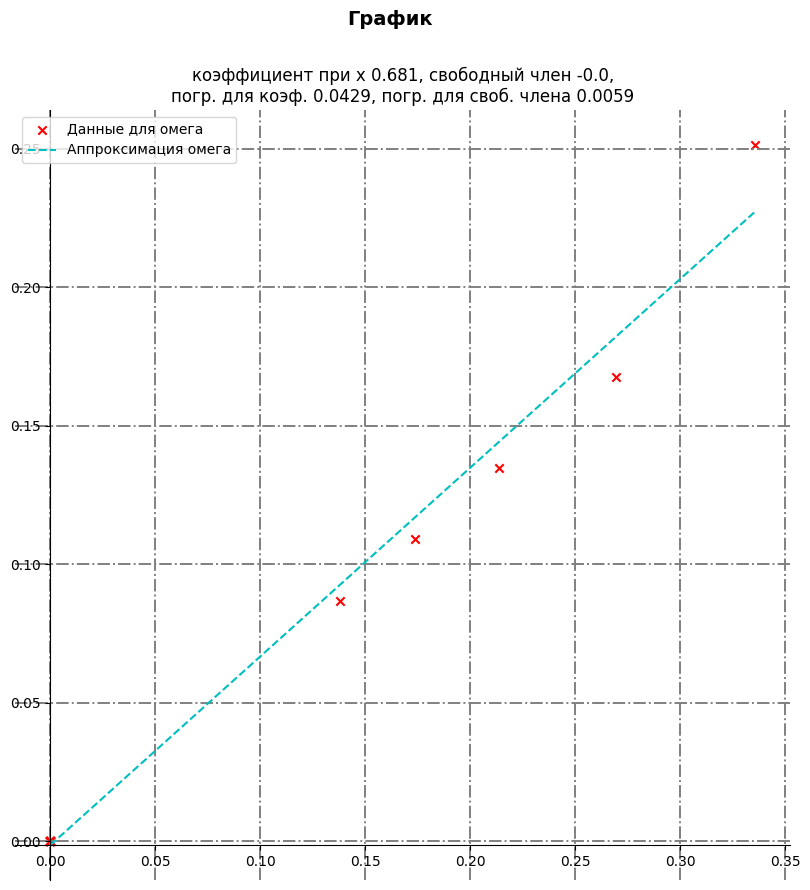

<Figure size 640x480 with 0 Axes>

4:80: E501 line too long (102 > 79 characters)
5:13: E128 continuation line under-indented for visual indent


In [24]:
plt.figure(figsize=(10, 10))


a = My_graphic(data_y=data_y, data_x=data_x, start_x=0, start_y=0, name='омега', cords_x=0, cords_y=0,
            deviation=True)


plt.suptitle(f'График', fontsize=14, fontweight='bold')

a.writing()
a.show()